# Notebook : étude de santé publique avec Python

# Mission
 Réaliser une étude de grande ampleur sur le thème de la sous-nutrition dans le monde. 

# 1. Importation des librairies

Librairie  : Un package est simplement un dossier contenant plusieurs fichiers Python (.py) 

In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Observation et nettoyage des fichiers

Faire les observations des donnes et ainsi pouvoir parcourir chacune des colonnes pour détecter les erreurs, les corriger, puis actualiser les colonnes en conséquence.


## 2-1. Fichier aide_alimentaire.csv

Charger l'échantillon à partir de ce fichier CSV (qu'il vous faut télécharger) dans une variable que nous appellerons  data. Cette variable sera donc un dataframe.

In [3]:
aide1= pd.read_csv("aide_alimentaire.csv")

dataseat.head()

Afficher les 5 premières lignes du dataframe aide1.

In [4]:
aide1.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


Reennvoie les étiquettes de colonne du Dataframe.

In [5]:
aide1.columns

Index(['Pays bénéficiaire', 'Année', 'Produit', 'Valeur'], dtype='object')

Reenvoie les types de variable de chaque colonne attribué 

In [6]:
aide1.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

Cette méthode imprime des informations sur un DataFrame, y compris le dtype d’index et les colonnes, les valeurs non null et l’utilisation de la mémoire.

In [7]:
aide1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


Propriété qui renvoie un tuple représentant la dimensionnalité du DataFrame. Le format de la forme serait (lignes, colonnes).

In [8]:
aide1.shape

(1475, 4)

 Renvoyer des valeurs uniques basées sur une table 

In [9]:
aide1['Pays bénéficiaire'].unique()

array(['Afghanistan', 'Algérie', 'Angola', 'Bangladesh', 'Bénin',
       'Bhoutan', 'Bolivie (État plurinational de)', 'Burkina Faso',
       'Burundi', 'Cambodge', 'Cameroun', 'Chine, continentale',
       'Colombie', 'Comores', 'Congo', "Côte d'Ivoire", 'Cuba',
       'Djibouti', 'Égypte', 'El Salvador', 'Équateur', 'Éthiopie',
       'Gambie', 'Géorgie', 'Ghana', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Haïti', 'Honduras',
       "Iran (République islamique d')", 'Iraq', 'Jordanie', 'Kenya',
       'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Libye',
       'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Mozambique',
       'Myanmar', 'Népal', 'Nicaragua', 'Niger', 'Ouganda', 'Pakistan',
       'Palestine', 'Philippines', 'République arabe syrienne',
       'République centrafricaine', 'République démocratique du Congo',
       'République démocratique populaire lao', 'République dominicaine',
       'République populaire démocratique de Corée',
       'République-Unie de T

In [10]:
aide1['Année'].unique()

array([2013, 2014, 2015, 2016], dtype=int64)

In [11]:
aide1['Produit'].unique()

array(['Autres non-céréales', 'Blé et Farin', 'Céréales',
       'Fruits secs, total', 'Huiles végétales',
       'Légumineuses Sèches,Tot.', 'Non-céréales', 'Riz, total',
       'Sucre, total', 'Céréales Secondaires', 'Lait, total',
       'Mélanges et préparations', 'Poiss&produi', 'BulgurFarEnt',
       'Viande Total', 'Graisses Com'], dtype=object)

Compte des valeurs uniques 

In [12]:
aide1['Pays bénéficiaire'].value_counts()

Algérie                            39
Yémen                              38
République arabe syrienne          38
Éthiopie                           33
Nicaragua                          33
                                   ..
Angola                              4
Zambie                              4
Comores                             2
Égypte                              2
Bolivie (État plurinational de)     2
Name: Pays bénéficiaire, Length: 76, dtype: int64

In [13]:
aide1['Produit'].value_counts()

Non-céréales                220
Céréales                    200
Huiles végétales            179
Légumineuses Sèches,Tot.    171
Riz, total                  147
Mélanges et préparations    142
Autres non-céréales         120
Sucre, total                 67
Céréales Secondaires         61
Blé et Farin                 58
Fruits secs, total           39
BulgurFarEnt                 24
Lait, total                  23
Poiss&produi                 21
Viande Total                  2
Graisses Com                  1
Name: Produit, dtype: int64

In [14]:
aide1['Année'].value_counts()

2013    519
2014    461
2015    391
2016    104
Name: Année, dtype: int64

Calcul des statistiques élementaires (min,max,moyenne, écart type...) pour toutes les variables quantitatives

In [15]:
aide1.describe(include='all')

,Pays bénéficiaire,Année,Produit,Valeur
count,1475,1475.000000,1475,1475.000000
unique,76,NaN,16,NaN
top,Algérie,NaN,Non-céréales,NaN
freq,39,NaN,220,NaN
mean,NaN,2014.054237,NaN,7481.966780
std,NaN,0.946916,NaN,23339.531424
min,NaN,2013.000000,NaN,0.000000
25%,NaN,2013.000000,NaN,287.500000
50%,NaN,2014.000000,NaN,1178.000000
75%,NaN,2015.000000,NaN,4334.500000


isna() method (or it's alias isnull()  and then sum to count the NaN values. 

**isna** converte chaqu'un des cellules df en un valeurs booleanset ensuite calculer la moyenne. les valeur booleans sont convertis en booleans et apres converti en valeur entiere 0 et 1 et ensuite la moyenne de les colonnes

In [16]:
aide1.isna().sum()

Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64

In [17]:
aide1.isnull().sum()

Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64

### 2-1.1  Nettoyage

Synthétiserles jeux des données. Pretreatement de la base de données

Renommer la colonne "valeur". -    
Unite: Valeur est en tonnes (quantité qui a été donnée comme aide alimentaire), en tonnes=> mettre en Kg 

 Changement de nom colonne Valeur a Aide_kg


In [18]:
aide1.rename(columns={'Pays bénéficiaire':'Pays','Valeur':"Aide_kg"}, inplace=True) 
aide1['Aide_kg']*= 1000
aide1.head()


,Pays,Année,Produit,Aide_kg
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


Changement de nom en Pays valeur Swaziland à Eswatini

In [19]:

aide1['Pays']= aide1['Pays'].replace(['Swaziland'],'Eswatini')
aide1['Pays'].unique()

array(['Afghanistan', 'Algérie', 'Angola', 'Bangladesh', 'Bénin',
       'Bhoutan', 'Bolivie (État plurinational de)', 'Burkina Faso',
       'Burundi', 'Cambodge', 'Cameroun', 'Chine, continentale',
       'Colombie', 'Comores', 'Congo', "Côte d'Ivoire", 'Cuba',
       'Djibouti', 'Égypte', 'El Salvador', 'Équateur', 'Éthiopie',
       'Gambie', 'Géorgie', 'Ghana', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Haïti', 'Honduras',
       "Iran (République islamique d')", 'Iraq', 'Jordanie', 'Kenya',
       'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Libye',
       'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Mozambique',
       'Myanmar', 'Népal', 'Nicaragua', 'Niger', 'Ouganda', 'Pakistan',
       'Palestine', 'Philippines', 'République arabe syrienne',
       'République centrafricaine', 'République démocratique du Congo',
       'République démocratique populaire lao', 'République dominicaine',
       'République populaire démocratique de Corée',
       'République-Unie de T

### 2-2. Fichier population.csv

In [20]:
pop1 = pd.read_csv('population.csv')

dataseat.head()

In [21]:
pop1.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [22]:
pop1.columns

Index(['Zone', 'Année', 'Valeur'], dtype='object')

In [23]:
pop1.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [24]:
pop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [25]:
pop1.shape

(1416, 3)

Nombre des valeurs differentes population (pop1)

In [26]:
pop1['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Antilles néerlandaises (ex)', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)',
       'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Curaçao', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équate

In [27]:
pop1['Zone'].nunique()

236

In [28]:
pop1['Année'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

Calcul des statistiques élementaires (min,max,moyenne, écart type...) pour toutes les variables quantitatives

In [29]:
pop1.describe(include='all')

,Zone,Année,Valeur
count,1416,1416.000000,1.416000e+03
unique,236,NaN,NaN
top,Afghanistan,NaN,NaN
freq,6,NaN,NaN
mean,NaN,2015.500000,3.144793e+04
std,NaN,1.708428,1.300812e+05
min,NaN,2013.000000,7.930000e-01
25%,NaN,2014.000000,3.783410e+02
50%,NaN,2015.500000,5.126480e+03
75%,NaN,2017.000000,1.930666e+04


The isna() method (or it's alias isnull()  and then sum to count the NaN values. 

In [30]:
pop1.isna().sum()

Zone      0
Année     0
Valeur    0
dtype: int64

In [31]:
pop1.isnull().sum()

Zone      0
Année     0
Valeur    0
dtype: int64

### 2-2.1 Nettoyage

 ### Commentaires pop1
Renommer la colonne "Zone" et "Valeur".  -
Unite: Valeur est en milliers d'habitants.

Changement de nom Zone à Pays et Valeur et mettre en milliers d'habitants  

In [32]:
pop1.rename(columns={"Zone":"Pays", "Valeur":"Pop"}, inplace=True) 
pop1['Pop']*= 1000
pop1.head()

,Pays,Année,Pop
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


Changement de nom en Pays valeur Royaume-Uni de Grande-Bretagne et d'Irlande du Nord à Royaume-Uni

In [33]:

pop1['Pays']= pop1['Pays'].replace(["Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"],'Royaume-Uni')
pop1['Pays'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Antilles néerlandaises (ex)', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)',
       'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Curaçao', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équate

### 2-3. Fichier dispo_alimentaire.csv

In [34]:
dispo1 = pd.read_csv('dispo_alimentaire.csv')

In [35]:
dispo1.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [36]:
dispo1.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [37]:
dispo1.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [38]:
dispo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [39]:
dispo1.shape

(15605, 18)

Nombre des valeurs differentes dispo_alimentaire (dispo1)

In [40]:
dispo1['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize', 'Bermudes',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brunéi Darussalam', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, Taiwan Province de',
       'Chine, continentale', 'Chypre', 'Colombie', 'Congo', 'Costa Rica',
       'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti',
       'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini',
       'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'H

In [41]:
dispo1['Zone'].nunique()

174

In [42]:
dispo1['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [43]:
dispo1['Produit'].nunique()

98

In [44]:
dispo1['Origine'].unique()

array(['animale', 'vegetale'], dtype=object)

Calcul des statistiques élementaires (min,max,moyenne, écart type...) pour toutes les variables quantitatives

In [45]:
dispo1.describe(include='all')

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605,15605,15605,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
unique,174,98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Inde,Abats Comestible,vegetale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,174,11896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,NaN,NaN,NaN,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,NaN,NaN,NaN,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,NaN,NaN,NaN,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000


Renvoie le nombre de valeurs manquantes dans chaque colonne

In [46]:
dispo1.isna().sum()
dispo1.fillna(0, inplace=True)

In [47]:
dispo1.isna().sum()

Zone                                                             0
Produit                                                          0
Origine                                                          0
Aliments pour animaux                                            0
Autres Utilisations                                              0
Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Exportations - Quantité                                          0
Importations - Quantité                                          0
Nourriture                                                       0
Pertes                                                           0
Production                                                    

In [48]:
dispo1.isnull().sum()

Zone                                                             0
Produit                                                          0
Origine                                                          0
Aliments pour animaux                                            0
Autres Utilisations                                              0
Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Exportations - Quantité                                          0
Importations - Quantité                                          0
Nourriture                                                       0
Pertes                                                           0
Production                                                    

In [49]:
dispo1['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

### 2-3.1 Nettoyage

### Commentaires dispo1

Renommer la colonne "Zone" =>
Unite: -10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire.  --
Elles sont toutes exprimées en milliers de tonnes(kilotonnes, kt) => mettre en Kg 

Changement de noms 

In [50]:
dispo1.rename(columns={"Zone":"Pays","Aliments pour animaux":"Aliments pour animaux_kg","Autres Utilisations":"Autres Utilisations_kg","Disponibilité intérieure":"Disponibilité intérieure_kg","Exportations - Quantité":"Exportations- Quantité_kg","Importations - Quantité":"Importations- Quantité_kg","Nourriture":"Nourriture _kg","Pertes":"Pertes_kg","Production":"Production_kg","Semences":"Semences_kg","Traitement":"Traitement_kg","Variation de stock":"Variation de stock_kg"}, inplace=True) 
dispo1.head()

,Pays,Produit,Origine,Aliments pour animaux_kg,Autres Utilisations_kg,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure_kg,Exportations- Quantité_kg,Importations- Quantité_kg,Nourriture _kg,Pertes_kg,Production_kg,Semences_kg,Traitement_kg,Variation de stock_kg
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [51]:
dispo1.columns

Index(['Pays', 'Produit', 'Origine', 'Aliments pour animaux_kg',
       'Autres Utilisations_kg',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure_kg', 'Exportations- Quantité_kg',
       'Importations- Quantité_kg', 'Nourriture _kg', 'Pertes_kg',
       'Production_kg', 'Semences_kg', 'Traitement_kg',
       'Variation de stock_kg'],
      dtype='object')

In [52]:
tonnes_to_kg = ["Aliments pour animaux_kg","Autres Utilisations_kg","Disponibilité intérieure_kg","Exportations- Quantité_kg","Importations- Quantité_kg","Nourriture _kg","Pertes_kg","Production_kg","Semences_kg","Traitement_kg","Variation de stock_kg"]
                
for tonne1 in tonnes_to_kg:
                dispo1[tonne1] *= 1000000


In [53]:
dispo1.head()

,Pays,Produit,Origine,Aliments pour animaux_kg,Autres Utilisations_kg,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure_kg,Exportations- Quantité_kg,Importations- Quantité_kg,Nourriture _kg,Pertes_kg,Production_kg,Semences_kg,Traitement_kg,Variation de stock_kg
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [54]:
dispo1.isnull().sum().sum()

0

Changement de nom en Pays valeur Swaziland à Eswatini

In [55]:
dispo1['Pays']= dispo1['Pays'].replace(['Tchéquie (la)'],'Tchéquie')
dispo1['Pays'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize', 'Bermudes',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brunéi Darussalam', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, Taiwan Province de',
       'Chine, continentale', 'Chypre', 'Colombie', 'Congo', 'Costa Rica',
       'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti',
       'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini',
       'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'H

### 2-4. Fichier sous_nutrition.csv

In [56]:
nutri1 = pd.read_csv('sous_nutrition.csv')

In [57]:
nutri1.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [58]:
nutri1.columns

Index(['Zone', 'Année', 'Valeur'], dtype='object')

In [59]:
nutri1.dtypes # attention au type de '´Valeur' qui doit etre un numerique et penser a une solution pour la valeur <0.1 

Zone      object
Année     object
Valeur    object
dtype: object

In [60]:
nutri1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [61]:
nutri1.shape

(1218, 3)

In [62]:
nutri1.describe(include='all')

# d'abord remplacer la valeur "<0.1" soit par 0 ou par un autre chiffre. 
# ensuite changer le type de cette colonne en numeric

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Afghanistan,2012-2014,<0.1
freq,6,203,120


In [63]:
nutri1.isnull().sum()

Zone        0
Année       0
Valeur    594
dtype: int64

In [64]:
###Calcul des statistiques élementaires (min,max,moyenne, écart type...) pour toutes les variables quantitatives
nutri1.describe(include='all')

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Afghanistan,2012-2014,<0.1
freq,6,203,120


### 2-4.1 Nettoyage

D'abord remplacer la valeur "<0.1"  par 0.1, ensuite changer le type de cette colonne en numeric 

In [65]:
nutri1['Valeur']= nutri1['Valeur'].replace(['<0.1'],'0.01')
nutri1['Valeur']= nutri1['Valeur'].astype(float)
nutri1.fillna(0, inplace=True)
nutri1.describe(include='all')

,Zone,Année,Valeur
count,1218,1218,1218.000000
unique,203,6,NaN
top,Afghanistan,2012-2014,NaN
freq,6,203,NaN
mean,NaN,NaN,2.615764
std,NaN,NaN,14.148629
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,0.010000
75%,NaN,NaN,1.200000


In [66]:
nutri1.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

### Commentaires nutri1
Renommer la colonne "Zone" et "Valeur" --- 
Unite: "Valeur"en millions d’habitants(personnes sous-alimentation)  =>  en Millions d'habitants

Changement de nom Zone a Pays et Valeur a milliers d'habitants  

In [67]:
nutri1.rename(columns={"Zone":"Pays", "Valeur":'PopSN'}, inplace=True) 
nutri1['PopSN']*= 1000000
nutri1.head()

,Pays,Année,PopSN
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [68]:
nutri1.isnull().sum()

Pays     0
Année    0
PopSN    0
dtype: int64

In [69]:
nutri1.describe()

,PopSN
count,1.218000e+03
mean,2.615764e+06
std,1.414863e+07
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+04
75%,1.200000e+06
max,2.038000e+08


In [70]:
nutri1['Année'].unique()

array(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'], dtype=object)

# 3. Analyse des données 

### 3-1. Proportion des personnes en état de sous-nutrition, année 2017

Jointure des tables Pop1 (2017) avec Nutri1 (2016-2018) index (Pays)

In [71]:
proportion = pd.merge(pop1.loc[pop1['Année'] == 2017, ['Pays','Année', 'Pop']],
                nutri1.loc[nutri1['Année'] == '2016-2018', ['Pays', 'PopSN']],
                on = 'Pays')
proportion.head()

,Pays,Année,Pop,PopSN
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0


In [72]:
print("Proportion de personnes en état de sous nutrition:", "{:.2f}".format(proportion["PopSN"].sum()*100/proportion["Pop"].sum()), "%")

Proportion de personnes en état de sous nutrition: 7.17 %


In [73]:
proportion.sum()

Pays     AfghanistanAfrique du SudAlbanieAlgérieAllemag...
Année                                               407434
Pop                                           7477071318.0
PopSN                                          535900000.0
dtype: object

### 3-2. Nombre théorique de personnes qui pourraient être nourries en 2017

Jointure dispo alimentaire avec population, index (Pays) . Ensuite, calculer la disponibilite alimentaire en Kcal, 

In [74]:
dispo_Mondial = dispo1.merge (pop1.loc[pop1['Année']== 2017 , ['Pays', 'Pop', 'Année']], on = 'Pays', how = "outer")

Kcal_Total_An = dispo_Mondial ['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_Mondial['Pop'] *365

print("Disponibilite alimentaire en kcal:",  "{:.2f}".format (Kcal_Total_An.sum()), "kcal")

Disponibilite alimentaire en kcal: 7731489402627990.00 kcal


In [75]:

total = round (Kcal_Total_An.sum()/(2500*365))
print("Nbre total d'etre humain pouvant etre nourris:", total)

print("Pourcentage:","{:.2f}".format(total * 100/pop1.loc[pop1['Année']== 2017, 'Pop'].sum()),"%") 

Nbre total d'etre humain pouvant etre nourris: 8472865099
Pourcentage: 112.25 %


### 3-3. Nombre théorique de personnes qui pourraient être nourries avec la disponibilité alimentaire des produits végétaux


Jointure Dispo_alimentaire et Population sur l'anne 2017 avec Index (Pays) 

In [76]:
disp_vegetale = pd.merge(dispo1.loc[dispo1["Origine"] == 'vegetale'],
                pop1.loc[pop1['Année']== 2017 , ['Pays', 'Pop', 'Année']], 
                on = 'Pays') 

nourri_vegetaux = disp_vegetale ['Disponibilité alimentaire (Kcal/personne/jour)'] * disp_vegetale ['Pop'] *365
print("Disponibilité alimentaire vegetale en kcal:",  "{:.2f}".format (nourri_vegetaux.sum()), "kcal")


Disponibilité alimentaire vegetale en kcal: 6369070937911640.00 kcal


In [77]:
disp_vegetale.head()

,Pays,Produit,Origine,Aliments pour animaux_kg,Autres Utilisations_kg,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure_kg,Exportations- Quantité_kg,Importations- Quantité_kg,Nourriture _kg,Pertes_kg,Production_kg,Semences_kg,Traitement_kg,Variation de stock_kg,Pop,Année
0,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,2017
1,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,2017
2,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,2017
3,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,2017
4,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000000.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,2017


In [78]:
nourri_vegetaux_total = round (nourri_vegetaux.sum()/(2500*365))
print("Nbre total d'etre humain pouvant etre nourris avec produits vegetaux:", nourri_vegetaux_total)
print("Pourcentage:","{:.2f}".format (nourri_vegetaux_total*100/ pop1.loc[pop1['Année']== 2017, 'Pop'].sum()),"%")

Nbre total d'etre humain pouvant etre nourris avec produits vegetaux: 6979803768
Pourcentage: 92.47 %


### 3-4. L'utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale,  celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine. 


Disponibilité Alimentaire 

In [79]:
dispo_alimentaire = dispo1['Production_kg'] + dispo1['Importations- Quantité_kg']  + dispo1['Variation de stock_kg'] 
print ("Disponibilidad Alimentaire:", "{:.2f}".format (dispo_alimentaire.sum()))

Disponibilidad Alimentaire: 11201331000000.00


Disponibilité intérieure 

In [80]:
dispo_interieure = dispo_alimentaire - dispo1['Exportations- Quantité_kg']
print ("dispo_interieure:", "{:.2f}".format (dispo_interieure.sum()))

dispo_interieure: 9849173000000.00


Calcul des proportions attribuées a la dispo interieure

In [81]:
dispo_sum1 = dispo_interieure.sum()

for X in ['Aliments pour animaux_kg','Pertes_kg', 'Nourriture _kg' ]:
    print("Proportion de", X, ":", "{:.2F}".format(dispo1[X].sum()*100/dispo_sum1),  "%")   
    

Proportion de Aliments pour animaux_kg : 13.24 %
Proportion de Pertes_kg : 4.61 %
Proportion de Nourriture _kg : 49.51 %


### Graphique de disponibilté interieur 



On remarque la presence d'un lien logique entre les 10 variables quantitative du dataframe dispo alimentaire (dispo1) qui ce presente sous la forme d'une équation :

Semences + Nourriture + Perte + Autre utilisation + Aliments pour animaux + Traitement = Disponibilité intérieure = Production + Importations - Exportations + Variation des stocks

Proportion de Semences_kg : 1.57 %
Proportion de Nourriture _kg : 49.51 %
Proportion de Pertes_kg : 4.61 %
Proportion de Autres Utilisations_kg : 8.78 %
Proportion de Aliments pour animaux_kg : 13.24 %
Proportion de Traitement_kg : 22.38 %
Proportion de Production_kg : 101.63 %
Proportion de Importations- Quantité_kg : 13.16 %
Proportion de Exportations- Quantité_kg : 13.73 %
Proportion de Variation de stock_kg : -1.06 %


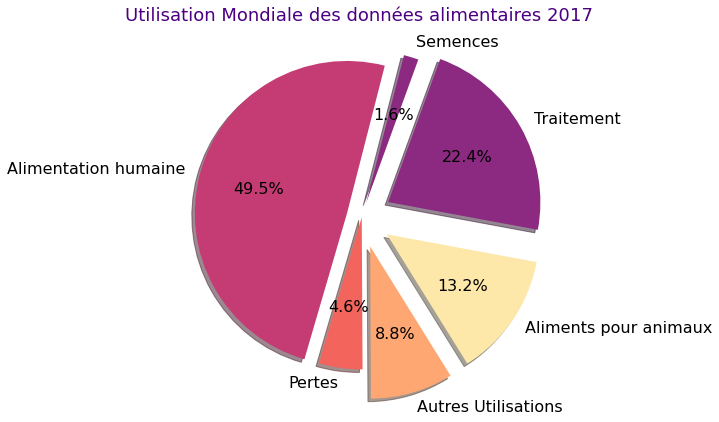

In [103]:
dispo_sum = dispo1["Disponibilité intérieure_kg"].sum()


for X in ['Semences_kg', 'Nourriture _kg', 'Pertes_kg', 'Autres Utilisations_kg', 'Aliments pour animaux_kg', 'Traitement_kg', 'Production_kg','Importations- Quantité_kg', 'Exportations- Quantité_kg', 'Variation de stock_kg']:
    print("Proportion de", X, ":", "{:.2F}".format(dispo1[X].sum()*100/dispo_sum), "%")


    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    
labels = 'Semences', 'Alimentation humaine', 'Pertes', 'Autres Utilisations', 'Aliments pour animaux', 'Traitement' 
sizes = [1.57, 49.51, 4.61, 8.78, 13.24, 22.38 ]
explode = (0.1,0.1,0,0.2,0.2,0.2)# only "explode" the 3nd slice (i.e. 'Nourriture')
colors = plt.cm.magma(np.linspace(0.4,0.95,5))



fig1, ax = plt.subplots(figsize=(7,7))
ax.pie(sizes, explode=explode, labels=labels,colors=colors,autopct='%1.1f%%',shadow=True, startangle=70,
        wedgeprops=dict(width=1), textprops={'fontsize': 16})
plt.title('Utilisation Mondiale des données alimentaires 2017 ' ,fontsize=18, color='indigo')

plt.show()



## 4  Questions de Mélanie 

### 4-1  Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017


Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017


,Pays,Proportion_pays_2017
78,Haïti,48.26
157,République populaire démocratique de Corée,47.19
108,Madagascar,41.06
103,Libéria,38.28
100,Lesotho,38.25
182,Tchad,37.96
160,Rwanda,35.06
121,Mozambique,32.81
185,Timor-Leste,32.17
0,Afghanistan,28.93


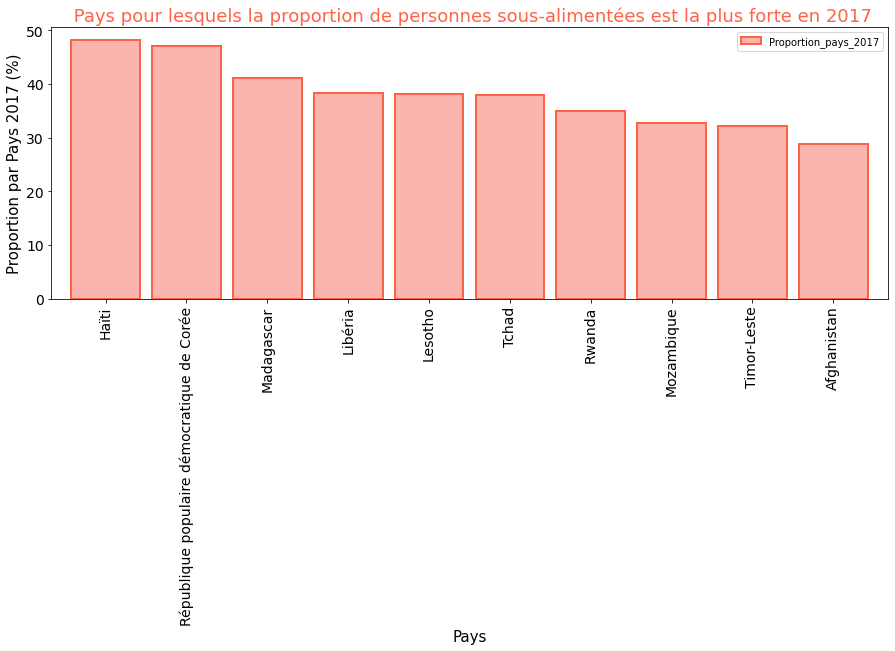

In [83]:

proportion['Proportion_pays_2017'] = round ((proportion["PopSN"]*100/proportion["Pop"]),2)
RT = proportion[['Pays', 'Proportion_pays_2017' ]].sort_values(['Proportion_pays_2017'], ascending = False).head(10)


RT.head(10).plot.bar( 'Pays', rot = 90, legend =True , figsize =(15,5), width=0.85, linewidth=2, edgecolor="#FF6347", 
                     colormap = cm.get_cmap("Pastel1"), fontsize=14)
plt.title(' Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017',fontsize=18, color = 'tomato')
plt.xlabel ('Pays',fontsize=15)
plt.ylabel('Proportion par Pays 2017 (%)', fontsize=15)

RT


###   4-2  Les pays qui ont le plus bénéficié d’aide depuis 2013

In [85]:
aide1.head()

,Pays,Année,Produit,Aide_kg
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


,Aide_kg
Pays,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


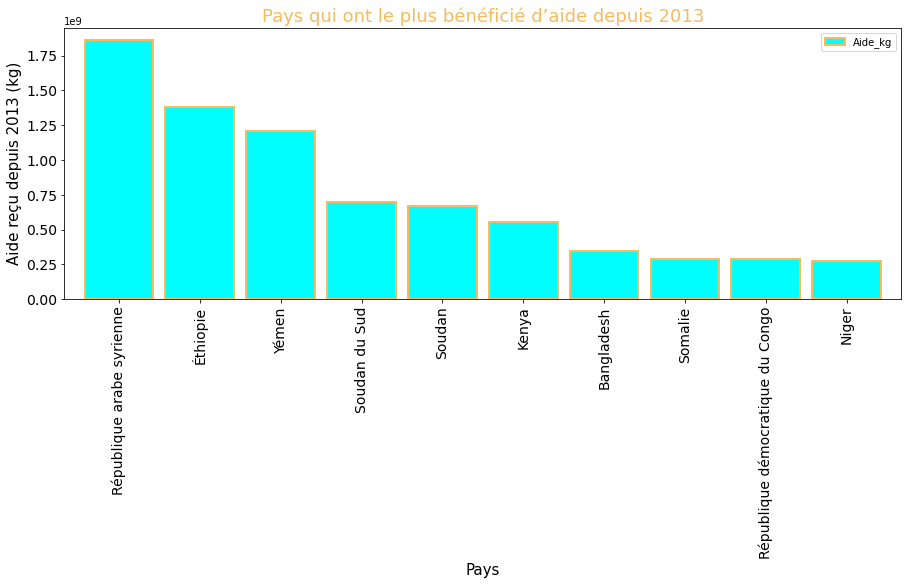

In [86]:
Aide_a = aide1
benef_pays = pd.DataFrame(Aide_a)
benef_pays = benef_pays.groupby('Pays')[[ 'Aide_kg']].sum().sort_values(by= "Aide_kg", ascending = False).head(10)

benef_pays .head(10).plot.bar(rot = 90, legend =True , figsize =(15,5), width=0.85, linewidth=2, edgecolor="#f7bb5f", colormap = cm.get_cmap("cool"), fontsize=14 )

plt.title('Pays qui ont le plus bénéficié d’aide depuis 2013',fontsize=18,color = '#f7bb5f')
plt.xlabel ('Pays',fontsize=15)
plt.ylabel('Aide reçu depuis 2013 (kg)', fontsize=15)


benef_pays


###  4-3 Les pays ayant le plus/le moins de disponibilité/habitant

####  Calculer les Pays ayant la plus disponibilité alimentaire jour pour habitant 

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


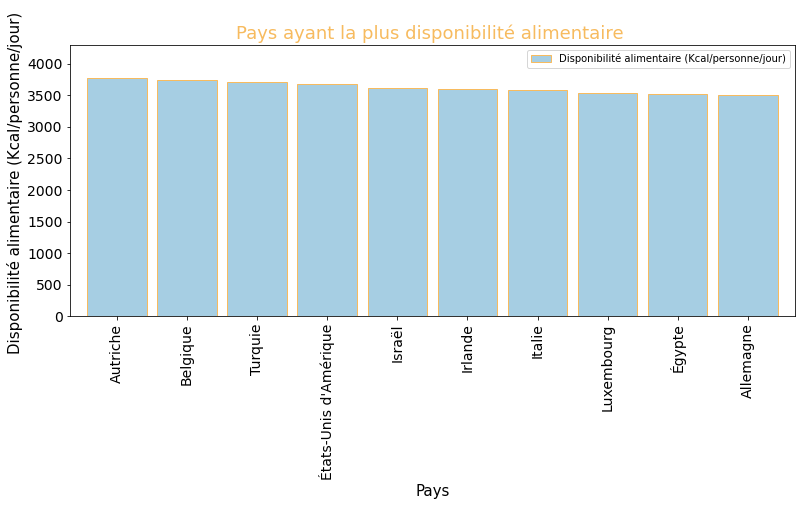

In [87]:

dispo_pays = dispo1[['Pays', 'Produit','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Pays').sum().sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',  ascending =False).head(10)

# Graphique  Pays ayant la plus disponibilité alimentaire annuel pour habitant

dispo_pays.head(10).plot.bar(rot = 90, legend =True , figsize =(13,5), width=0.85, linewidth=1, edgecolor="#f7bb5f", colormap = cm.get_cmap("Paired"), fontsize=14 )

plt.title('Pays ayant la plus disponibilité alimentaire ',fontsize=18,color = '#f7bb5f')
plt.xlabel ('Pays',fontsize=15)
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour) ', fontsize=15)
plt.ylim(0, 4300)

dispo_pays

####  Calculer les Pays ayant la moins disponibilité alimentaire jour pour habitant 

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


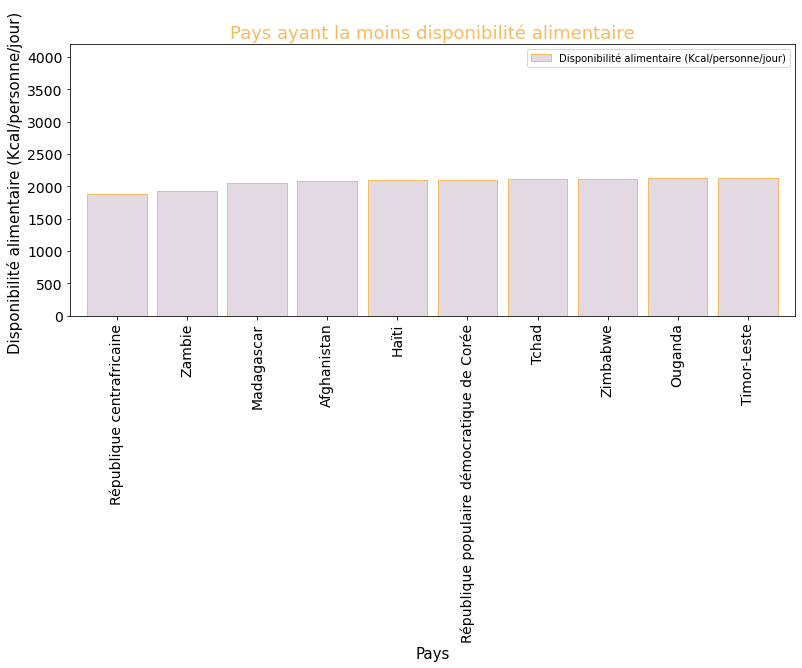

In [88]:
dispo_pays = dispo1[['Pays', 'Produit','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Pays').sum().sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending =True).head(10)


# Graphique  Pays ayant la plus disponibilité alimentaire journalière  pour habitant

dispo_pays.head(10).plot.bar(rot = 90, legend =True , figsize =(13,5), width=0.85, linewidth=1, edgecolor="#f7bb5f", colormap = cm.get_cmap("twilight"), fontsize=14 )

plt.title('Pays ayant la moins disponibilité alimentaire', fontsize=18,color = '#f7bb5f')
plt.xlabel ('Pays',fontsize=15)
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour) ', fontsize=15)
plt.ylim(0, 4200)

dispo_pays

### 4-4 Utilisation des céréales, notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux

In [89]:
dispo1['Produit'].value_counts()

Abats Comestible          174
Fruits, Autres            174
Poissons Eau Douce        174
Maïs                      174
Pommes                    174
                         ... 
Sucre, betterave          107
Ignames                    80
Sucre non centrifugé       30
Huile de Son de Riz        21
Viande de Anim Aquatiq      3
Name: Produit, Length: 98, dtype: int64

In [90]:
liste_cereales = ["Blé et produits", "Riz et produits", "Orge et produits", "Maïs et produits", "Seigle et produits",
                  "Avoine", "Millet et produits", "Sorgho et produits", "Céréales, Autres"]


In [91]:
#Création d'une table ne contenant que les informations des céréales
cereales = dispo1.loc[dispo1['Produit'].isin(liste_cereales),:]

print( "Proportion d'alimentation animale :", "{:.2f}".format(cereales['Aliments pour animaux_kg'].sum()*100/cereales['Disponibilité intérieure_kg'].sum()), "%")
print( "Proportion d'alimentation humaine :", "{:.2f}".format(cereales['Nourriture _kg'].sum()*100/cereales['Disponibilité intérieure_kg'].sum()), "%")


Proportion d'alimentation animale : 69.34 %
Proportion d'alimentation humaine : 18.13 %


In [92]:
cereales['Produit'].unique()

array(['Céréales, Autres', 'Avoine'], dtype=object)

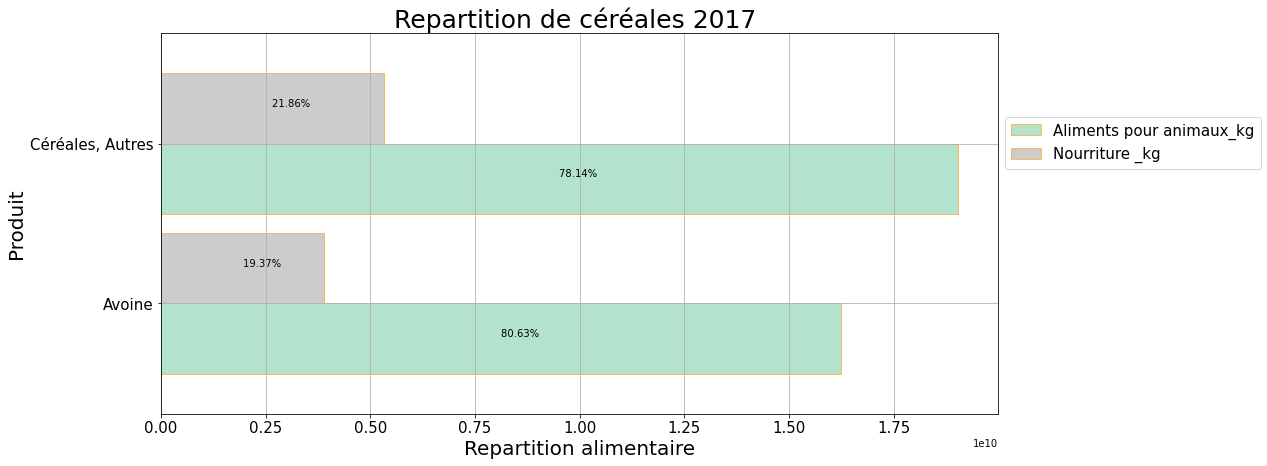

,Aliments pour animaux_kg,Nourriture _kg
Produit,,
Avoine,1.625100e+10,3.903000e+09
"Céréales, Autres",1.903500e+10,5.324000e+09


In [93]:
#test2



cerea = cereales[['Produit', 'Aliments pour animaux_kg', 'Nourriture _kg' ]].groupby('Produit').sum().sort_values(by='Produit', ascending =True).head(10)




ax = cerea.plot.barh( figsize=(15, 7), stacked=False,  width= 0.88,edgecolor="#f7bb5f", 
                     colormap = cm.get_cmap("Pastel2"), fontsize=14)

ax.set_title('Repartition de céréales 2017 ', fontsize=25)  # Titulo de la grafica
ax.set_ylabel('Produit', fontsize=20) # Titulo eje y
ax.set_xlabel('Repartition alimentaire', fontsize=20) # Titulo eje x
ax.legend(bbox_to_anchor=(1, 0.8), fontsize=15) #ubicación leyenda
ax.tick_params(axis="x", rotation=0, labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)

abs_values = cerea.values
rel_values = abs_values / abs_values.sum(axis=1, keepdims=True) * 100

labels = zip(abs_values.T.flatten(), rel_values.T.flatten())

for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{rel_value:.2f}% "
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x=x + width / 2, 
            y=y + height / 2, 
            s=label,
            horizontalalignment='left', 
            verticalalignment='bottom'                       
            )
    

plt.show()  
 

cerea



###  4-5  Enfin, je me souviens d’un exemple étonnant d’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition. Il serait intéressant d’aller à nouveau y jeter un coup d’œil, de mémoire ça concernait l’exportation par rapport à la production.

In [94]:
proportion.head()

,Pays,Année,Pop,PopSN,Proportion_pays_2017
0,Afghanistan,2017,36296113.0,10500000.0,28.93
1,Afrique du Sud,2017,57009756.0,3100000.0,5.44
2,Albanie,2017,2884169.0,100000.0,3.47
3,Algérie,2017,41389189.0,1300000.0,3.14
4,Allemagne,2017,82658409.0,0.0,0.00


### Thaïlande aux égards de la proportion de personnes en sous-nutrition

Utiliser .loc pour faire un filtre sur le dataFrame et obtenir la proportion de personnes en sous_nutrition en Thaïlande 

In [95]:
proportion.loc[proportion['Pays']=='Thaïlande']

,Pays,Année,Pop,PopSN,Proportion_pays_2017
184,Thaïlande,2017,69209810.0,6200000.0,8.96


### Exportation du manioc par rapport à la production 

Exportation du manioc par rapport à la production avec le filtre .loc

In [96]:
manioc1 =dispo1.loc[(dispo1['Produit']=='Manioc' ) & (dispo1['Pays']=='Thaïlande'), ['Production_kg', 'Exportations- Quantité_kg']]

Expo_manioc = round((manioc1 ['Exportations- Quantité_kg'].sum()  / manioc1['Production_kg'].sum()*100))

print ("Proportion de l'exportation du manioc :", "{:.2f}".format(Expo_manioc), "%")  

Proportion de l'exportation du manioc : 83.00 %
